## Importing

In [108]:
# for loading/processing the images
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input

# models
from keras.applications.vgg16 import VGG16
from keras.models import Model

# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# for everything else
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle

## Getting pictures and pre-processing

In [109]:
path = r"/content/drive/MyDrive/BRACELET"
# change the working directory to the path where the images are located
os.chdir(path)

# this list holds all the image filename
flowers = []

# creates a ScandirIterator aliased as files
with os.scandir(path) as files:
  # loops through each file in the directory
    for file in files:
        flowers.append(file.name)

In [110]:
flowers

['bracelet_217.jpg',
 'bracelet_219.jpg',
 'bracelet_184.jpg',
 'bracelet_183.jpg',
 'bracelet_180.jpg',
 'bracelet_181.jpg',
 'bracelet_186.jpg',
 'bracelet_182.jpg',
 'bracelet_185.jpg',
 'bracelet_212.jpg',
 'bracelet_215.jpg',
 'bracelet_214.jpg',
 'bracelet_213.jpg',
 'bracelet_216.jpg',
 'bracelet_211.jpg',
 'bracelet_210.jpg',
 'bracelet_209.jpg',
 'bracelet_218.jpg',
 'bracelet_208.jpg',
 'bracelet_070.jpg',
 'bracelet_033.jpg',
 'bracelet_066.jpg',
 'bracelet_170.jpg',
 'bracelet_051.jpg',
 'bracelet_144.jpg',
 'bracelet_205.jpg',
 'bracelet_001.jpg',
 'bracelet_099.jpg',
 'bracelet_027.jpg',
 'bracelet_108.jpg',
 'bracelet_041.jpg',
 'bracelet_030.jpg',
 'bracelet_204.jpg',
 'bracelet_020.jpg',
 'bracelet_147.jpg',
 'bracelet_158.jpg',
 'bracelet_117.jpg',
 'bracelet_113.jpg',
 'bracelet_189.jpg',
 'bracelet_069.jpg',
 'bracelet_017.jpg',
 'bracelet_193.jpg',
 'bracelet_097.jpg',
 'bracelet_065.jpg',
 'bracelet_107.jpg',
 'bracelet_056.jpg',
 'bracelet_149.jpg',
 'bracelet_04

## Extracting feature vectors using VGG

In [111]:
model = VGG16()
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)

def extract_features(file, model):
    # load the image as a 224x224 array
    img = load_img(file, target_size=(224,224))
    # convert from 'PIL.Image.Image' to numpy array
    img = np.array(img)
    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3)
    # prepare image for model
    imgx = preprocess_input(reshaped_img)
    # get the feature vector
    features = model.predict(imgx, use_multiprocessing=True)
    return features

In [112]:
data = {}
p = r"/content/drive/MyDrive/BRACELET/features.pkl"

# lop through each image in the dataset
for flower in flowers:
    # try to extract the features and update the dictionary
    try:
        feat = extract_features(flower,model)
        data[flower] = feat
    # if something fails, save the extracted features as a pickle file (optional)
    except:
        with open(p,'wb') as file:
            pickle.dump(data,file)


1/1 [==============================] - 0s 17ms/step


In [113]:
# get a list of the filenames
filenames = np.array(list(data.keys()))

# get a list of just the features
feat = np.array(list(data.values()))

# reshape so that there are 210 samples of 4096 vectors
feat = feat.reshape(-1,4096)

In [114]:
filenames

array(['bracelet_217.jpg', 'bracelet_219.jpg', 'bracelet_184.jpg',
       'bracelet_183.jpg', 'bracelet_180.jpg', 'bracelet_181.jpg',
       'bracelet_186.jpg', 'bracelet_182.jpg', 'bracelet_185.jpg',
       'bracelet_212.jpg', 'bracelet_215.jpg', 'bracelet_214.jpg',
       'bracelet_213.jpg', 'bracelet_216.jpg', 'bracelet_211.jpg',
       'bracelet_210.jpg', 'bracelet_209.jpg', 'bracelet_218.jpg',
       'bracelet_208.jpg', 'bracelet_070.jpg', 'bracelet_033.jpg',
       'bracelet_066.jpg', 'bracelet_170.jpg', 'bracelet_051.jpg',
       'bracelet_144.jpg', 'bracelet_205.jpg', 'bracelet_001.jpg',
       'bracelet_099.jpg', 'bracelet_027.jpg', 'bracelet_108.jpg',
       'bracelet_041.jpg', 'bracelet_030.jpg', 'bracelet_204.jpg',
       'bracelet_020.jpg', 'bracelet_147.jpg', 'bracelet_158.jpg',
       'bracelet_117.jpg', 'bracelet_113.jpg', 'bracelet_189.jpg',
       'bracelet_069.jpg', 'bracelet_017.jpg', 'bracelet_193.jpg',
       'bracelet_097.jpg', 'bracelet_065.jpg', 'bracelet_107.j

## Dimensionality Reduction

In [115]:
# reduce the amount of dimensions in the feature vector
pca = PCA(svd_solver='randomized', random_state=42)
pca.fit(feat)


PCA(random_state=42, svd_solver='randomized')

Text(0, 0.5, 'Variance Ratio')

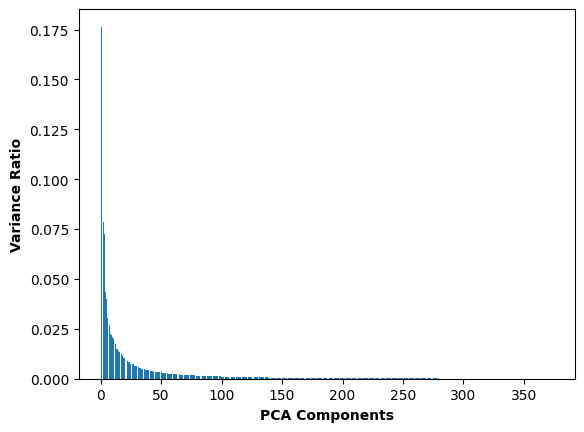

In [116]:
# Variance Ratio bar plot for each PCA components.

ax = plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.xlabel("PCA Components",fontweight = 'bold')
plt.ylabel("Variance Ratio",fontweight = 'bold')

Text(0, 0.5, 'Cumulative Explained Variance')

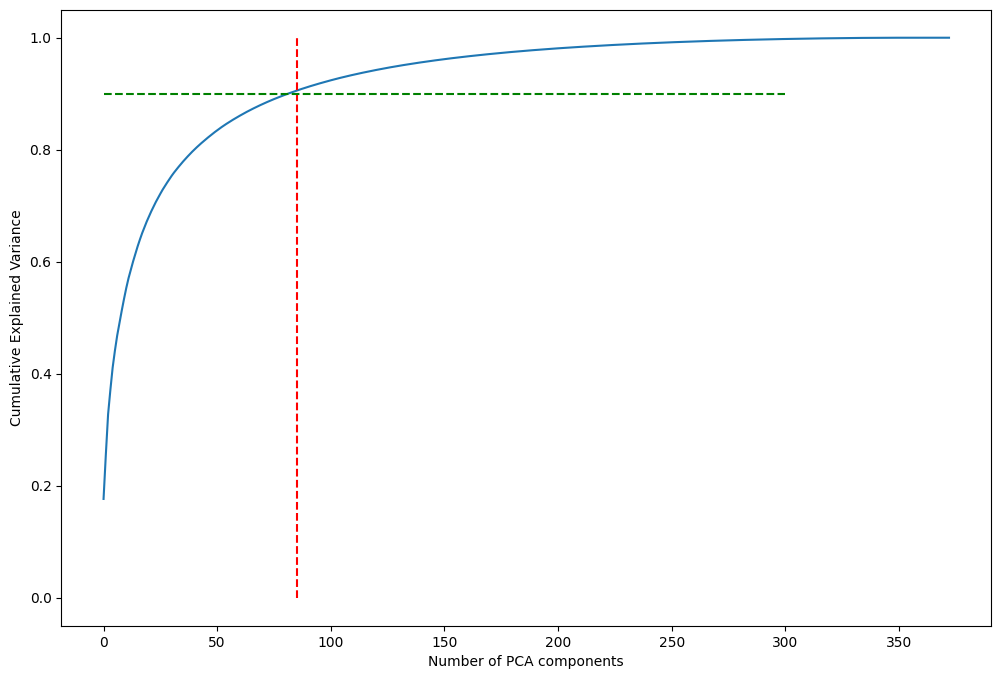

In [117]:
# Scree plot to visualize the Cumulative variance against the Number of components

fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.vlines(x=85, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.9, xmax=300, xmin=0, colors="g", linestyles="--")
plt.xlabel('Number of PCA components')
plt.ylabel('Cumulative Explained Variance')

In [118]:
# reduce the amount of dimensions in the feature vector
pca = PCA(n_components=85, random_state=22)
pca.fit(feat)
x = pca.transform(feat)

## Clustering into Groups

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

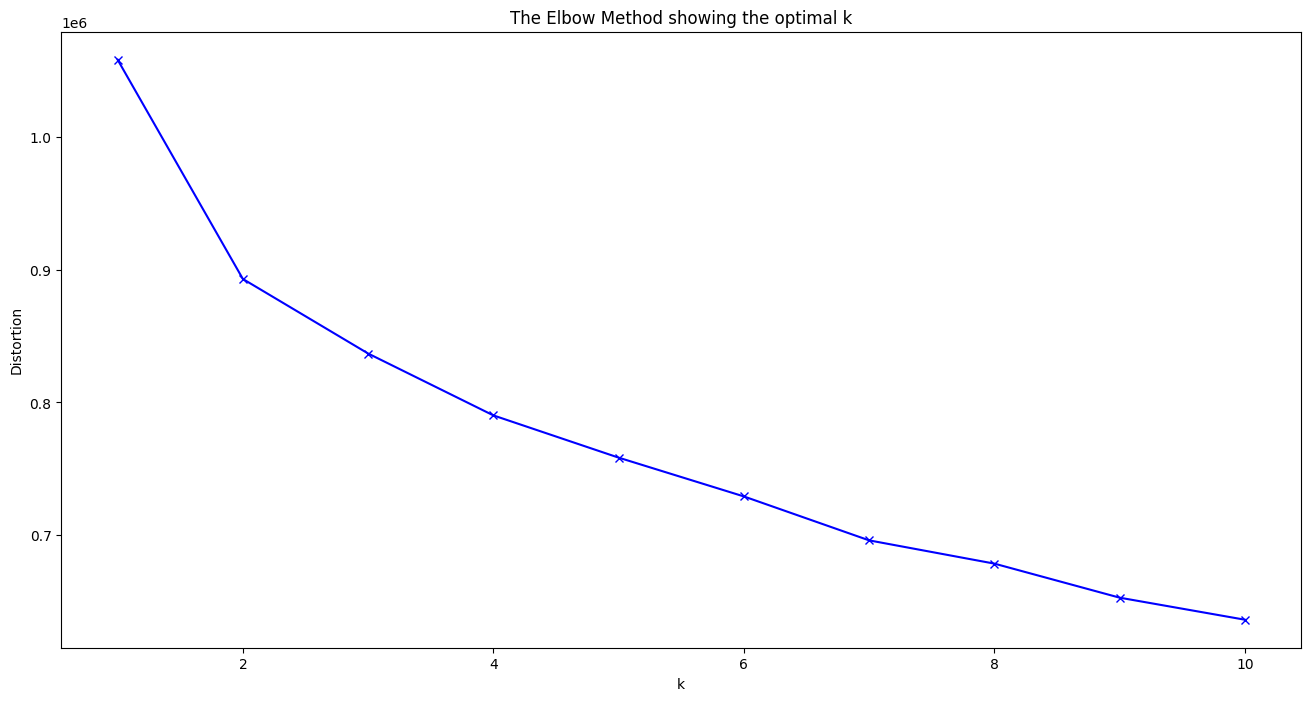

In [119]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming 'x' is your data
distortions = []
K = range(1,11)  # Adjust the range as needed
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(x)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

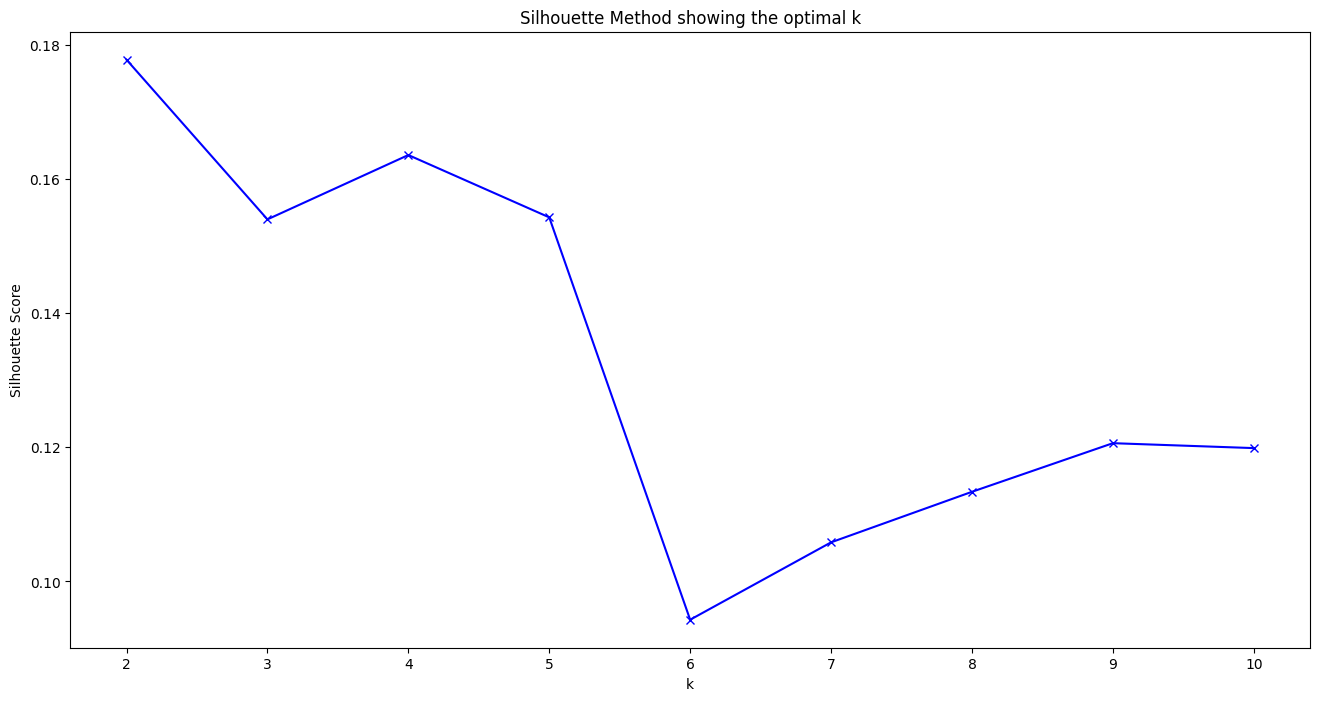

In [120]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
K = range(2, 11)  # Silhouette score is not defined for a single cluster

for k in K:
    kmeans = KMeans(n_clusters=k).fit(x)
    silhouette_scores.append(silhouette_score(x, kmeans.labels_))

plt.figure(figsize=(16,8))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method showing the optimal k')
plt.show()


In [121]:
# cluster feature vectors
kmeans = KMeans(n_clusters=3, random_state=22)
kmeans.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=22)

In [122]:
from sklearn.metrics import silhouette_score
silhouette_score(x, kmeans.labels_)

0.16267784

In [123]:
# holds the cluster id and the images { id: [images] }
groups = {}
for file, cluster in zip(filenames,kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

In [124]:
groups

{1: ['bracelet_217.jpg',
  'bracelet_184.jpg',
  'bracelet_180.jpg',
  'bracelet_181.jpg',
  'bracelet_186.jpg',
  'bracelet_182.jpg',
  'bracelet_185.jpg',
  'bracelet_212.jpg',
  'bracelet_215.jpg',
  'bracelet_213.jpg',
  'bracelet_216.jpg',
  'bracelet_211.jpg',
  'bracelet_209.jpg',
  'bracelet_218.jpg',
  'bracelet_208.jpg',
  'bracelet_070.jpg',
  'bracelet_033.jpg',
  'bracelet_066.jpg',
  'bracelet_205.jpg',
  'bracelet_099.jpg',
  'bracelet_027.jpg',
  'bracelet_108.jpg',
  'bracelet_204.jpg',
  'bracelet_158.jpg',
  'bracelet_117.jpg',
  'bracelet_189.jpg',
  'bracelet_193.jpg',
  'bracelet_107.jpg',
  'bracelet_149.jpg',
  'bracelet_048.jpg',
  'bracelet_038.jpg',
  'bracelet_006.jpg',
  'bracelet_136.jpg',
  'bracelet_169.jpg',
  'bracelet_063.jpg',
  'bracelet_165.jpg',
  'bracelet_009.jpg',
  'bracelet_110.jpg',
  'bracelet_126.jpg',
  'bracelet_162.jpg',
  'bracelet_154.jpg',
  'bracelet_164.jpg',
  'bracelet_115.jpg',
  'bracelet_151.jpg',
  'bracelet_072.jpg',
  'brac

In [125]:
# function that lets you view a cluster (based on identifier)
def view_cluster(cluster):
    plt.figure(figsize = (25,25));
    # gets the list of filenames for a cluster
    files = groups[cluster]
    # only allow up to 30 images to be shown at a time
    if len(files) > 30:
        print(f"Clipping cluster size from {len(files)} to 30")
        files = files[:29]
    # plot each image in the cluster
    for index, file in enumerate(files):
        plt.subplot(10,10,index+1);
        img = load_img(file)
        img = np.array(img)
        plt.imshow(img)
        plt.axis('off')

Clipping cluster size from 89 to 30


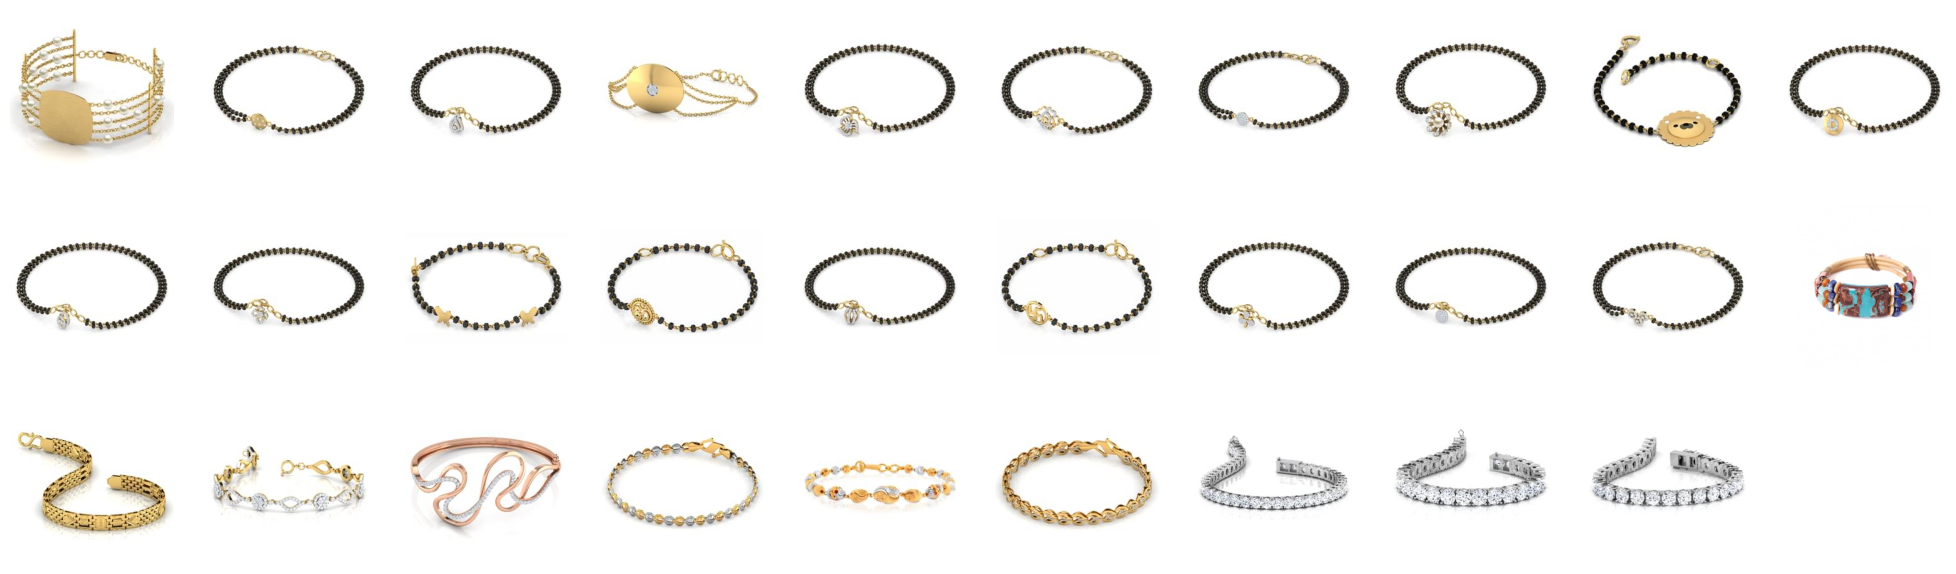

In [126]:
view_cluster(0) #Beads

Clipping cluster size from 164 to 30


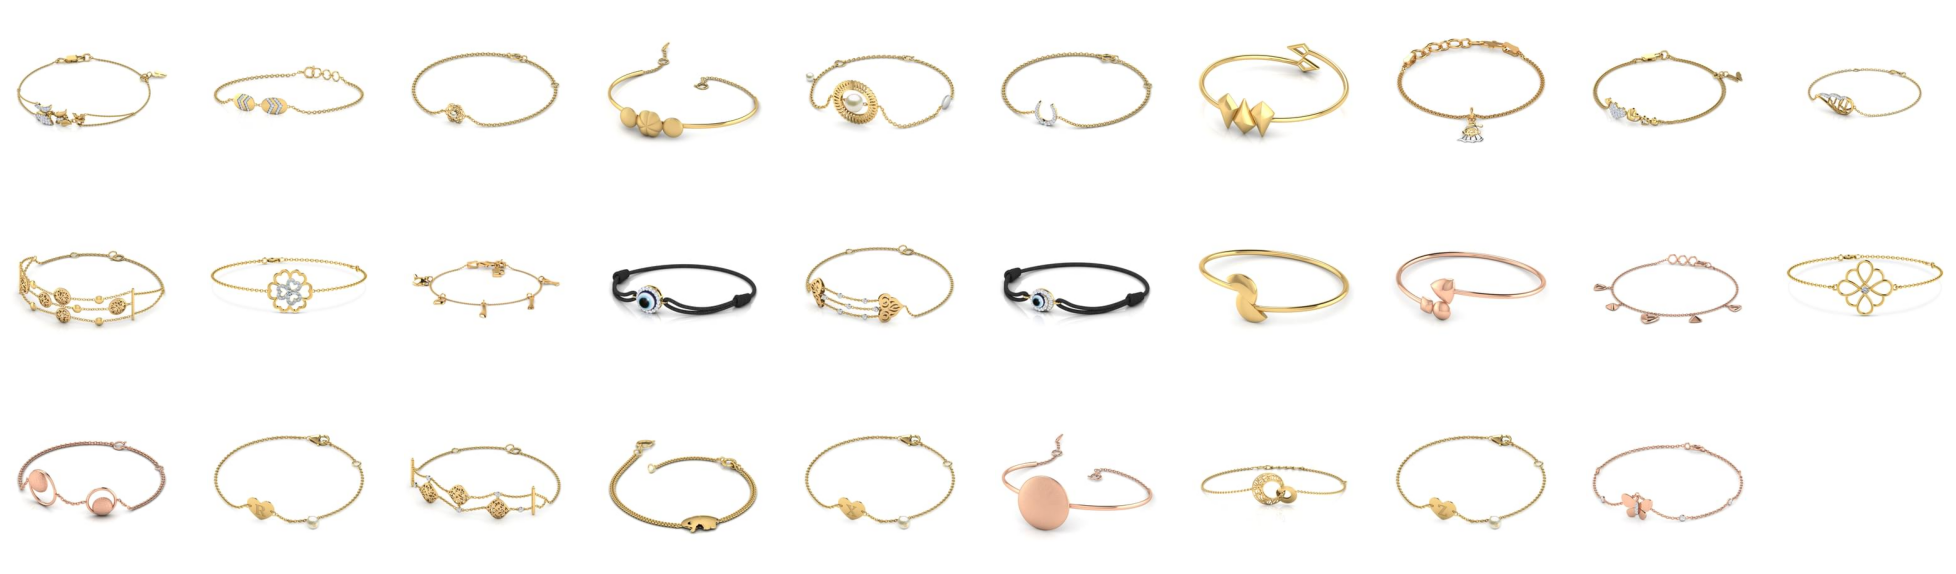

In [127]:
view_cluster(1) #Thin

Clipping cluster size from 120 to 30


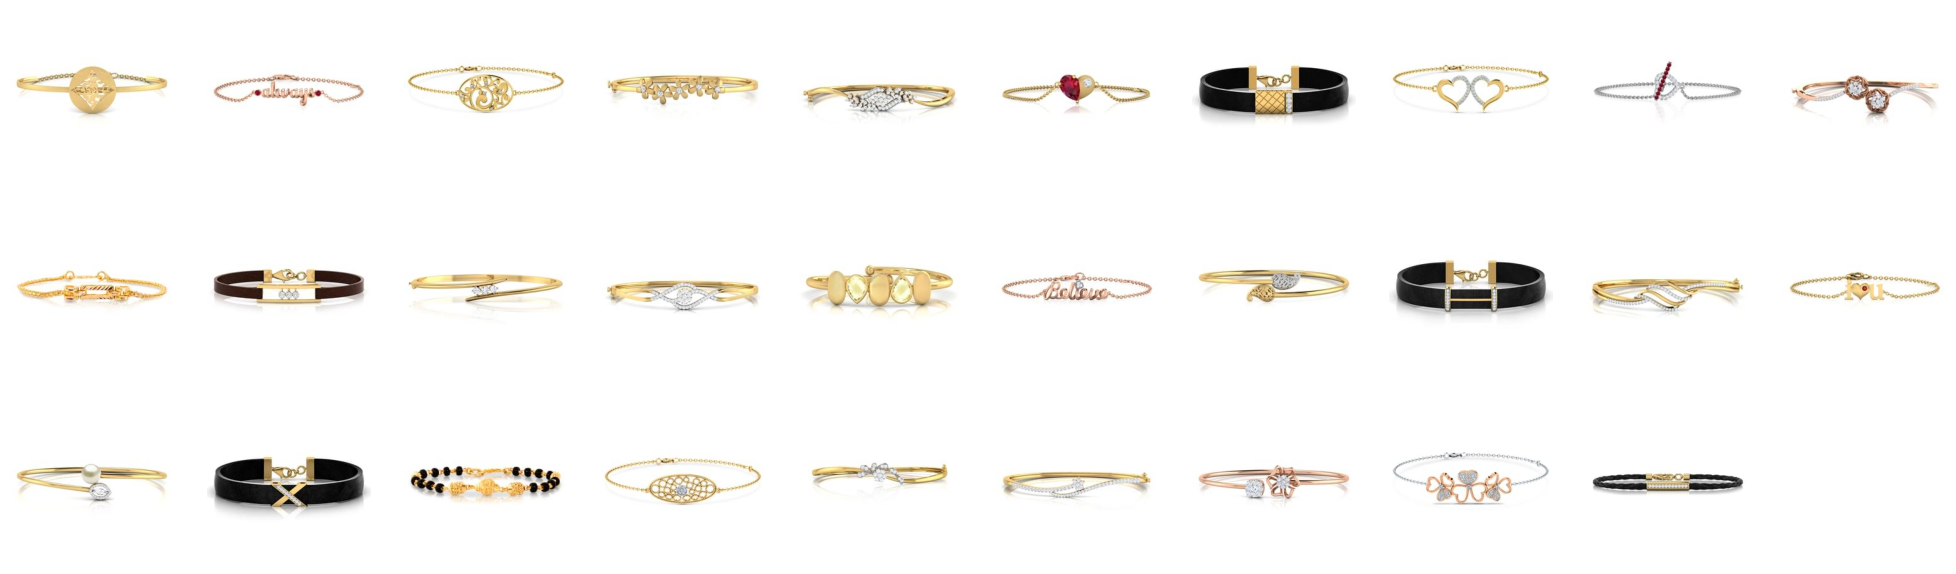

In [128]:
view_cluster(2) #Designer